In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

movie_cols = ['Movie ID','Movie Title', 'Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('data/movies.txt', sep="\t", header=None, names=movie_cols, encoding='latin-1')

rat_cols = ['User ID', 'Movie ID', 'Rating']
ratings = pd.read_csv('data/data.txt', sep="\t", header=None, names=rat_cols, encoding='latin-1')

In [4]:
Y_train.shape

(90000, 3)

In [5]:
Y_test.shape

(10000, 3)

In [6]:
movies

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
ratings

,User ID,Movie ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [8]:
moviesArr = np.array(movies)
ratingsArr = np.array(ratings)
print(movies.shape)
print(ratings.shape)

(1682, 21)
(100000, 3)


In [9]:
movie_ratings = pd.merge(movies, ratings)

Most popular movies

In [10]:
most_rated = movie_ratings.groupby(['Movie Title', 'Movie ID']).size().sort_values(ascending=False)[:30]
most_rated

Movie Title                                   Movie ID
Star Wars (1977)                              50          583
Contact (1997)                                258         509
Fargo (1996)                                  100         508
Return of the Jedi (1983)                     181         507
Liar Liar (1997)                              294         485
English Patient, The (1996)                   286         481
Scream (1996)                                 288         478
Toy Story (1995)                              1           452
Air Force One (1997)                          300         431
Independence Day (ID4) (1996)                 121         429
Raiders of the Lost Ark (1981)                174         420
Godfather, The (1972)                         127         413
Pulp Fiction (1994)                           56          394
Twelve Monkeys (1995)                         7           392
Silence of the Lambs, The (1991)              98          390
Jerry Maguire (

In [11]:
most_ratedID = [50,258,100,181,294,286,288,1,300,121]

In [12]:
movie_stats = movie_ratings.groupby('Movie Title').agg({'Rating': [np.size, np.mean]})
movie_stats.head()

Rating          
                            size      mean
Movie Title                               
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [13]:
movie_statsID = movie_ratings.groupby('Movie ID').agg({'Rating': [np.size, np.mean]})
movie_statsID.head()

Rating          
           size      mean
Movie ID                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [14]:
movie_stats.sort_values([('Rating', 'mean')], ascending=False)[:10]

Rating     
                                                    size mean
Movie Title                                                  
They Made Me a Criminal (1939)                         1  5.0
Marlene Dietrich: Shadow and Light (1996)              1  5.0
Saint of Fort Washington, The (1993)                   2  5.0
Someone Else's America (1995)                          1  5.0
Star Kid (1997)                                        3  5.0
Great Day in Harlem, A (1994)                          1  5.0
Aiqing wansui (1994)                                   1  5.0
Santa with Muscles (1996)                              2  5.0
Prefontaine (1997)                                     3  5.0
Entertaining Angels: The Dorothy Day Story (1996)      1  5.0

In [15]:
movie_statsID.sort_values([('Rating', 'mean')], ascending=False)[:10]

Rating     
           size mean
Movie ID            
814           1  5.0
1599          1  5.0
1201          1  5.0
1122          1  5.0
1653          1  5.0
1293          3  5.0
1500          2  5.0
1189          3  5.0
1536          1  5.0
1467          2  5.0

In [16]:
highest_ratedID = [814, 1599, 1201, 1122, 1653, 1293, 1500, 1189, 1536, 1467]

In [30]:
atleast_50 = movie_stats['Rating']['size'] >= 50
movie_stats[atleast_50].sort_values([('Rating', 'mean')], ascending=False)[:10]

Rating          
                                                     size      mean
Movie Title                                                        
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000

In [32]:
atleast_50ID = movie_statsID['Rating']['size'] >= 50
movie_statsID[atleast_50ID].sort_values([('Rating', 'mean')], ascending=False)[:10]

Rating          
           size      mean
Movie ID                 
408         112  4.491071
318         298  4.466443
169         118  4.466102
483         243  4.456790
114          67  4.447761
64          283  4.445230
603         209  4.387560
12          267  4.385768
50          583  4.358491
178         125  4.344000

In [19]:
highest_over50ID = [408, 318, 169, 483, 114, 64, 603, 12, 50, 178]

Overall ratings (number of ratings)

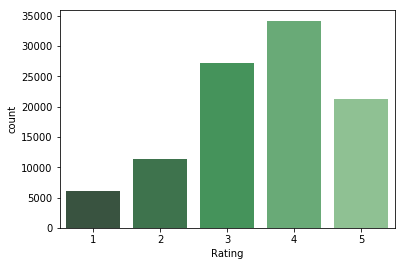

In [20]:
sns.countplot(x="Rating", data=ratings, palette="Greens_d");

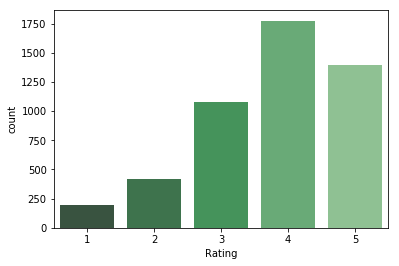

In [21]:
sns.countplot(x="Rating", data=ratings.loc[ratings['Movie ID'].isin(most_ratedID)], palette="Greens_d");

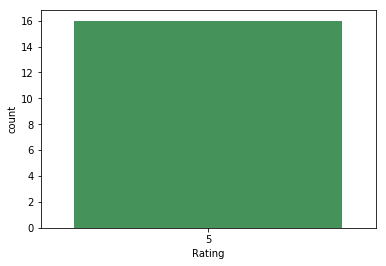

In [22]:
sns.countplot(x="Rating", data=ratings.loc[ratings['Movie ID'].isin(highest_ratedID)], palette="Greens_d");

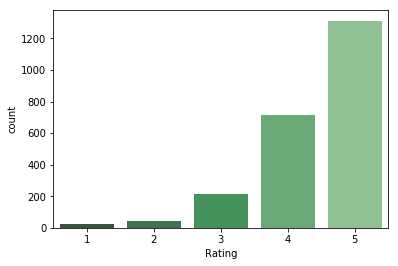

In [23]:
sns.countplot(x="Rating", data=ratings.loc[ratings['Movie ID'].isin(highest_over50ID)], palette="Greens_d");

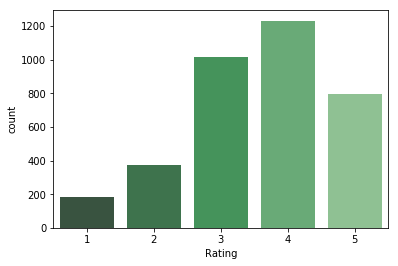

In [24]:
sns.countplot(x="Rating", data=movie_ratings.loc[movie_ratings['Animation'] == 1], palette="Greens_d");

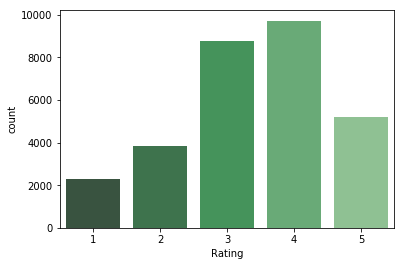

In [25]:
sns.countplot(x="Rating", data=movie_ratings.loc[movie_ratings['Comedy'] == 1], palette="Greens_d");

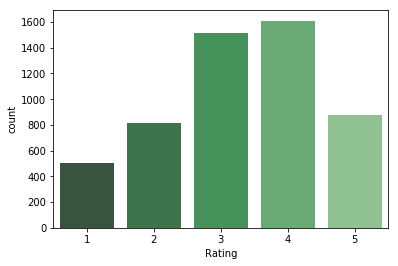

In [26]:
sns.countplot(x="Rating", data=movie_ratings.loc[movie_ratings['Horror'] == 1], palette="Greens_d");

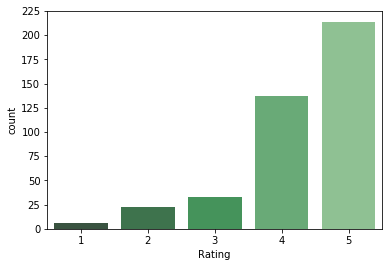

In [27]:
sns.countplot(x="Rating", data=movie_ratings.loc[movie_ratings['Movie ID'] == 127], palette="Greens_d");

In [33]:
movie_stats[atleast_50].sort_values([('Rating', 'size')], ascending=False)[:10]

Rating          
                                size      mean
Movie Title                                   
Star Wars (1977)                 583  4.358491
Contact (1997)                   509  3.803536
Fargo (1996)                     508  4.155512
Return of the Jedi (1983)        507  4.007890
Liar Liar (1997)                 485  3.156701
English Patient, The (1996)      481  3.656965
Scream (1996)                    478  3.441423
Toy Story (1995)                 452  3.878319
Air Force One (1997)             431  3.631090
Independence Day (ID4) (1996)    429  3.438228

In [34]:
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies

In [35]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta*(reg*Ui - Vj*(Yij - np.dot(Ui,Vj)))

In [36]:
def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta*(reg*Vj - Ui*(Yij - np.dot(Ui,Vj)))

In [37]:
def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    N,D = Y.shape
    error = 0
    
    for n in range(N):
        i = Y[n,0] - 1
        j = Y[n,1] - 1
        yij = Y[n,2]
        error += (yij - np.dot(U[i], V[j]))**2
        
    U_norm = np.linalg.norm(U)
    V_norm = np.linalg.norm(V)
    
    return (reg/2 *(U_norm**2 + V_norm**2) + error/2) / N

In [38]:
def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i + 1, j + 1, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    #Initialize U and V
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((N,K)) - 0.5
    
    P,_ = Y.shape
    
    first_err = get_err(U,V,Y,reg)
    first_delta = 0
    prev_err = first_err
    cur_err = first_err
    print("First error {}".format(first_err))
    
    for epoch in range(max_epochs):
        indices = np.random.permutation(P)
        for p in indices:
            i = Y[p,0] - 1
            j = Y[p,1] - 1
            yij = Y[p,2]
            U[i,:] = U[i,:] - grad_U(U[i,:], yij, V[j,:], reg, eta)
            V[j,:] = V[j,:] - grad_V(V[j,:], yij, U[i,:], reg, eta)
            
        cur_err = get_err(U,V,Y,reg)
        #print("Epoch {}, error = {},".format(epoch+1, cur_err))
        
        if epoch==0:
            first_delta = np.abs(first_err - cur_err)
            #print("Delta 0,1 = {}".format(first_delta))
            
        cur_delta = np.abs(prev_err - cur_err)
        #print("Current delta = {}".format(cur_delta))
        #print("ratio = {}".format(cur_delta/first_delta))
        
        if cur_delta/first_delta < eps:
            return (U, V, cur_err)
            
        prev_err = cur_err
    
    return (U, V, cur_err)

In [39]:
K = 20

reg = 0.0
eta = 0.03 # learning rate
E_in = 0
E_out = 0

# Use to compute Ein and Eout
U,V, err = train_model(M, N, K, eta, reg, Y_train)
E_in = err
E_out = get_err(U, V, Y_test)

First error 6.935379720233136


In [40]:
V.shape

(1682, 20)

In [41]:
def visualize_2d(M, index=None, labels=[], filename=None):
    """Project a matrix into 2 dimensions and visualize it.

    If the input is mxn, produces a 2xn projection using the first two left singular vectors of M,
    and produces a scatterplot of the columns of this projection.

    If list index is provided, plots only the subset of columns indicated.

    If labels are provided, the indicated points are labeled in place on the graph (based on index
    matching between the labels list and the columns of the projection).

    If filename is provided, outputs the plot to the file indicated. Otherwise, outputs to the
    current matplotlib device.

    """
    # TODO consider mean-centering M
    A, sigma, B = np.linalg.svd(M)
    M_proj = np.matmul(A[:,:2].transpose(), M)
    # TODO: consider rescaling

    index = index or range(M.shape[1])
    plt.close('all')
    ax = plt.figure().gca()
    ax.scatter(M_proj[0,index], M_proj[1,index], marker='.')
    for i, label in enumerate(labels):
        if i not in index:
            continue
        ax.annotate(label, M_proj[:,i])

    if filename:
        plt.savefig(filename)
    else:
        plt.show()

    return M_proj

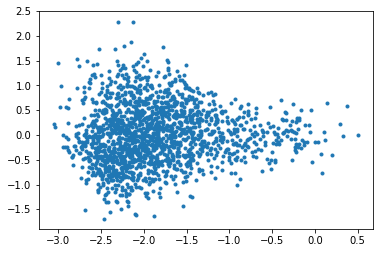

array([[-2.63909406, -2.06342783, -1.83796715, ..., -0.46713857,
        -0.9157271 , -1.13971997],
       [ 1.06869922,  0.66160002, -0.11321579, ...,  0.02931601,
        -0.01901843, -0.65146319]])

In [42]:
visualize_2d(V.T)

In [43]:
idx = [49, 61, 221, 227, 228, 229, 270, 379, 448, 449]

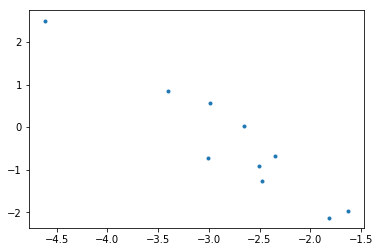

array([[-4.6194745 , -2.5060894 , -2.99202431, -3.40354255, -2.47828754,
        -3.00882924, -2.65488367, -2.34814295, -1.81739602, -1.62657547],
       [ 2.50399867, -0.90780597,  0.5669713 ,  0.85758587, -1.26371739,
        -0.71789377,  0.03380671, -0.68635537, -2.12770316, -1.98372305]])

In [44]:
visualize_2d(V[idx].transpose())

## Off the shelf

In [45]:
train_data_matrix = np.zeros((M,N))
for n in range(Y_train.shape[0]):
    i = Y_train[n,0] - 1
    j = Y_train[n,1] - 1
    yij = Y_train[n,2]
    train_data_matrix[i][j] = yij

In [46]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [47]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [48]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [49]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

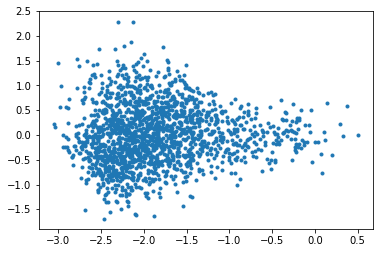

array([[-2.63909406, -2.06342783, -1.83796715, ..., -0.46713857,
        -0.9157271 , -1.13971997],
       [ 1.06869922,  0.66160002, -0.11321579, ...,  0.02931601,
        -0.01901843, -0.65146319]])

In [50]:
visualize_2d(V.T)

# Errors

Train error for off the shelf solution

In [57]:
get_err(np.dot(u, np.diag(s)), vt.T, Y_train)

2.4833788027802557

$E_{in}$ for solution taken from Homework 5

In [56]:
get_err(U, V, Y_train)

0.2536027534523067

Test error for off the shelf solution

In [59]:
get_err(np.dot(u, np.diag(s)), vt.T, Y_test)

3.131012715645946

$E_{out}$ for solution taken from Homework 5

In [52]:
get_err(U, V, Y_test)

0.6622366636927909

In [53]:
u.shape

(943, 20)

In [54]:
vt.shape

(20, 1682)